In [74]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import os
from PIL import  Image
%matplotlib inline
import itertools
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

## Loading Preprocessed Dataset with MoonPhase Function

In [75]:
dataset = pd.read_csv('C:/Users/sabhn/OneDrive/Desktop/KBS/Weather Prediction/MoonPhaseData.csv')

In [76]:
dataset.head()

,Date,Location,Altitude,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,MoonPhase,MoonLight
0,01-01-2009,Cobar,853.0,31.3939 S,145.8402 E,17.9,35.2,0.0,12.0,12.3,...,26.6,33.4,No,0.0,No,2009,1,1,waxing crescent (increasing to full),27
1,02-01-2009,Cobar,853.0,31.3939 S,145.8402 E,18.4,28.9,0.0,14.8,13.0,...,20.3,27.0,No,0.0,No,2009,1,2,waxing crescent (increasing to full),34
2,04-01-2009,Cobar,853.0,31.3939 S,145.8402 E,19.4,37.6,0.0,10.8,10.6,...,28.7,34.9,No,0.0,No,2009,1,4,in its first quarter (increasing to full),48
3,05-01-2009,Cobar,853.0,31.3939 S,145.8402 E,21.9,38.4,0.0,11.4,12.2,...,29.1,35.6,No,0.0,No,2009,1,5,in its first quarter (increasing to full),55
4,06-01-2009,Cobar,853.0,31.3939 S,145.8402 E,24.2,41.0,0.0,11.2,8.4,...,33.6,37.6,No,0.0,No,2009,1,6,in its first quarter (increasing to full),62


In [77]:
dataset["MoonPhase"] = dataset["MoonPhase"].astype('category')
dataset.dtypes

Date               object
Location           object
Altitude          float64
Latitude           object
Longitude          object
MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir        object
WindGustSpeed       int64
WindDir9am         object
WindDir3pm         object
WindSpeed9am        int64
WindSpeed3pm        int64
Humidity9am         int64
Humidity3pm         int64
Pressure9am       float64
Pressure3pm       float64
Cloud9am            int64
Cloud3pm            int64
Temp9am           float64
Temp3pm           float64
RainToday          object
RISK_MM           float64
RainTomorrow       object
Year                int64
Month               int64
Day                 int64
MoonPhase        category
MoonLight           int64
dtype: object

In [78]:
dataset.head()

,Date,Location,Altitude,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,MoonPhase,MoonLight
0,01-01-2009,Cobar,853.0,31.3939 S,145.8402 E,17.9,35.2,0.0,12.0,12.3,...,26.6,33.4,No,0.0,No,2009,1,1,waxing crescent (increasing to full),27
1,02-01-2009,Cobar,853.0,31.3939 S,145.8402 E,18.4,28.9,0.0,14.8,13.0,...,20.3,27.0,No,0.0,No,2009,1,2,waxing crescent (increasing to full),34
2,04-01-2009,Cobar,853.0,31.3939 S,145.8402 E,19.4,37.6,0.0,10.8,10.6,...,28.7,34.9,No,0.0,No,2009,1,4,in its first quarter (increasing to full),48
3,05-01-2009,Cobar,853.0,31.3939 S,145.8402 E,21.9,38.4,0.0,11.4,12.2,...,29.1,35.6,No,0.0,No,2009,1,5,in its first quarter (increasing to full),55
4,06-01-2009,Cobar,853.0,31.3939 S,145.8402 E,24.2,41.0,0.0,11.2,8.4,...,33.6,37.6,No,0.0,No,2009,1,6,in its first quarter (increasing to full),62


In [79]:
dataset["MoonPhase_cat"]=dataset["MoonPhase"].cat.codes

In [80]:
dataset.head()

,Date,Location,Altitude,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,MoonPhase,MoonLight,MoonPhase_cat
0,01-01-2009,Cobar,853.0,31.3939 S,145.8402 E,17.9,35.2,0.0,12.0,12.3,...,33.4,No,0.0,No,2009,1,1,waxing crescent (increasing to full),27,6
1,02-01-2009,Cobar,853.0,31.3939 S,145.8402 E,18.4,28.9,0.0,14.8,13.0,...,27.0,No,0.0,No,2009,1,2,waxing crescent (increasing to full),34,6
2,04-01-2009,Cobar,853.0,31.3939 S,145.8402 E,19.4,37.6,0.0,10.8,10.6,...,34.9,No,0.0,No,2009,1,4,in its first quarter (increasing to full),48,1
3,05-01-2009,Cobar,853.0,31.3939 S,145.8402 E,21.9,38.4,0.0,11.4,12.2,...,35.6,No,0.0,No,2009,1,5,in its first quarter (increasing to full),55,1
4,06-01-2009,Cobar,853.0,31.3939 S,145.8402 E,24.2,41.0,0.0,11.2,8.4,...,37.6,No,0.0,No,2009,1,6,in its first quarter (increasing to full),62,1


## Extracting Needed Columns 

In [82]:
dataset = dataset[['MinTemp', 'MaxTemp', 'Evaporation','Sunshine',
         'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow' , 'MoonLight', 'MoonPhase_cat']].reset_index(drop=True)

In [83]:
dataset.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,MoonLight,MoonPhase_cat
0,17.9,35.2,12.0,12.3,48,6,20,20,13,1006.3,1004.4,2,5,26.6,33.4,No,27,6
1,18.4,28.9,14.8,13.0,37,19,19,30,8,1012.9,1012.1,1,1,20.3,27.0,No,34,6
2,19.4,37.6,10.8,10.6,46,30,15,42,22,1012.3,1009.2,1,6,28.7,34.9,No,48,1
3,21.9,38.4,11.4,12.2,31,6,6,37,22,1012.7,1009.1,1,5,29.1,35.6,No,55,1
4,24.2,41.0,11.2,8.4,35,17,13,19,15,1010.7,1007.4,1,6,33.6,37.6,No,62,1


## Changing 'Rainfall Tommorrow' Column Values to Numeric

In [84]:
dataset.RainTomorrow.replace(('Yes', 'No'), (1, 0), inplace=True)

In [85]:
dataset.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,MoonLight,MoonPhase_cat
0,17.9,35.2,12.0,12.3,48,6,20,20,13,1006.3,1004.4,2,5,26.6,33.4,0,27,6
1,18.4,28.9,14.8,13.0,37,19,19,30,8,1012.9,1012.1,1,1,20.3,27.0,0,34,6
2,19.4,37.6,10.8,10.6,46,30,15,42,22,1012.3,1009.2,1,6,28.7,34.9,0,48,1
3,21.9,38.4,11.4,12.2,31,6,6,37,22,1012.7,1009.1,1,5,29.1,35.6,0,55,1
4,24.2,41.0,11.2,8.4,35,17,13,19,15,1010.7,1007.4,1,6,33.6,37.6,0,62,1


# Baseline Model - Logistic Regression

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

In [87]:
## Splitting Train and Test Data 
train,test = train_test_split(dataset,test_size = .25 ,random_state = 111)

In [88]:
#Separating columns
Id_col     = ['Date']
target_col = ["RainTomorrow"]

##Seperating Dependent and Independent Variables
cols    = [i for i in dataset.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     11056
           1       0.72      0.52      0.60      3049

   micro avg       0.85      0.85      0.85     14105
   macro avg       0.80      0.73      0.75     14105
weighted avg       0.84      0.85      0.84     14105

Accuracy   Score :  0.8513293158454449
Area Under Curve :  0.7305817125161199 

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



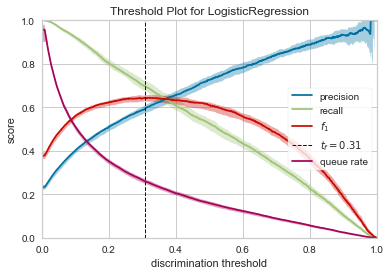

In [89]:
def rain_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification Report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area Under Curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not Rain","Rain"],
                        y = ["Not Rain","Rain"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot coeffs
    trace2 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=1, subplot_titles=('Confusion Matrix','Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend=False, title="Model Performance" ,
                         autosize = False,height = 900,width = 600,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
        
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

rain_prediction(logit,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)

    

# Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

 Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.98      0.91     11056
           1       0.82      0.35      0.49      3049

   micro avg       0.84      0.84      0.84     14105
   macro avg       0.83      0.66      0.70     14105
weighted avg       0.84      0.84      0.82     14105

Accuracy   Score :  0.8420418291386034
Area Under Curve :  0.6620687626699272 

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



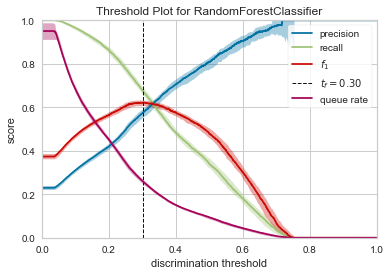

In [91]:
def randomforest(cols,nf_estimators,
                           estimated_tree,maximum_depth,
                           criterion_type,model_performance = None) :
    
    dataframe = dataset[cols + target_col].copy()
    
    #train and test datasets
    rf_x     = dataframe[[i for i in cols if i not in target_col]]
    rf_y     = dataframe[target_col]
    
    #random forest classifier
    rfc   = RandomForestClassifier(n_estimators = nf_estimators,
                                   max_depth = maximum_depth,
                                   criterion = criterion_type,
                                  )
    rfc.fit(rf_x,rf_y)
    
    #model performance
    if model_performance == True :
                 rain_prediction(rfc,
                                 rf_x,test_X,
                                 rf_y,test_Y,
                                 cols,"features",threshold_plot = True)
        

cols1 = [ i for i in train_X if i not in target_col + Id_col] 
randomforest(cols1,100,99,3,"entropy",True)

# Model Performance

In [97]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [98]:
#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                      })
    return df


In [99]:
#outputs for every model
model1 = model_report(logit,train_X,test_X,train_Y,test_Y,
                      "LogReg(Baseline)")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model2 = model_report(rfc,train_X,test_X,train_Y,test_Y,
                      "Random Forest")


In [100]:
#concat all models
model_performances = pd.concat([model1,model2],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,2))

py.iplot(table)

# Model Comparision

In [101]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","yellow")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"blue")
trace4  = output_tracer('f1_score',"white")

data = [trace1,trace2,trace3,trace4]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)